# The Sparks Foundation

#### Author : Pratikshya Sahoo
#### Batch : December 2020

# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict score using an appropriate predictor variable.


# Step 1: Importing the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

In [3]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's inspect the various aspects of our dataframe

In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Step 2: Visualising the Data

Let's now visualise our data using seaborn. 
We'll first make a pairplot of all the variables present to visualise which variables are most correlated.

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

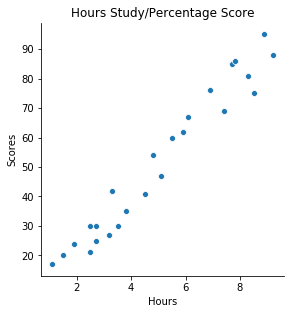

In [7]:
sns.pairplot(df, x_vars=['Hours'], y_vars='Scores',size=4, aspect=1, kind='scatter')
plt.title('Hours Study/Percentage Score')
plt.show()

From the above graph we can observe that there is a positive linear relation between the number of Hours and Percentage score

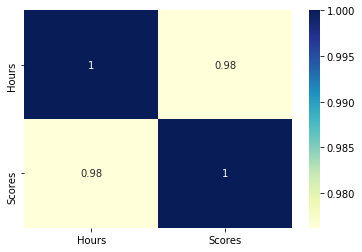

In [8]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

both the variables are correlated with each other

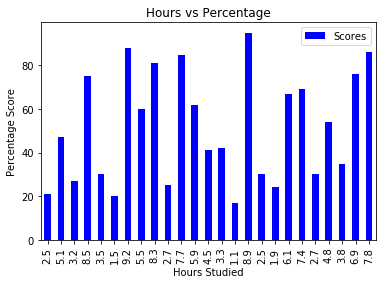

In [9]:
#lets see the distribution scores
df.plot(x='Hours',y='Scores',style = 'o',kind='bar', color ='blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

from the above visualization we can interpret that,
student who put more effort in studying ,get good marks/percentage.There is a strong linear relation between both the variables

# Step 3: Preparing the Data

In [10]:
#lets check the dataframe has any values or not
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

We first assign the Independent variable -Hours to the variable X and the dependent variable-Scores, to the variable y 

# Step 4: Performing Simple Linear Regression

### Generic Steps in model building using statsmodels

In [11]:
#Splitting the dataset into Training set and Test set
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(X_train,y_train)
#Predicting the test set results
y_pred = linearRegressor.predict(X_test)

### Plotting the regressor line

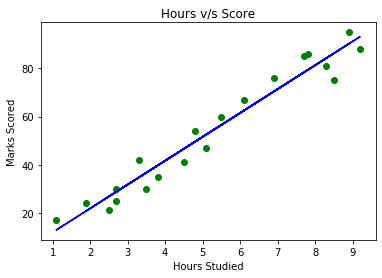

In [13]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, linearRegressor.predict(X_train), color = 'blue')
plt.title('Hours v/s Score')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.show()

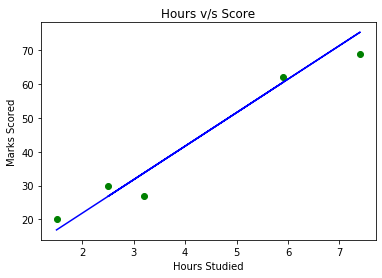

In [14]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, linearRegressor.predict(X_test), color = 'blue')
plt.title('Hours v/s Score')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.show()

### Making predictons

In [15]:
print(X_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


### Actual vs Predicted

In [16]:
hours= 9.5
hours = np.reshape(hours,(-1,1))  #-Reshaping our data
inp_pred = linearRegressor.predict(hours)
print("No. of hours = {}".format(hours))
print("No. of Score = {}".format(inp_pred))

No. of hours = [[9.5]]
No. of Score = [96.16939661]


### Evaluating the model

In [17]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("MSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 4.183859899002975
MSE: 21.5987693072174
MSE: 4.6474476121003665


In [18]:
from sklearn.metrics import r2_score
print("R2 square value :",r2_score(y_test,y_pred))

R2 square value : 0.9454906892105356
